### Load variables

In [14]:
import pickle

with open('documents.pkl', 'rb') as f:
    documents = pickle.load(f)
print(f'Loaded {len(documents)} documents from file.')

Loaded 31 documents from file.


In [25]:
from gensim import corpora

# Create a dictionary from the list of tokenized documents
dictionary = corpora.Dictionary(documents)
# Optionally filter out tokens that appear in very few or too many documents
dictionary.filter_extremes(no_below=5, no_above=0.4)
# Create the corpus in the bag-of-words format: a list of (token_id, count) pairs per document
corpus = [dictionary.doc2bow(doc) for doc in documents]

print("Size of dictionary:", len(dictionary))
print("Number of documents (corpus size):", len(corpus))

Size of dictionary: 2198
Number of documents (corpus size): 31


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


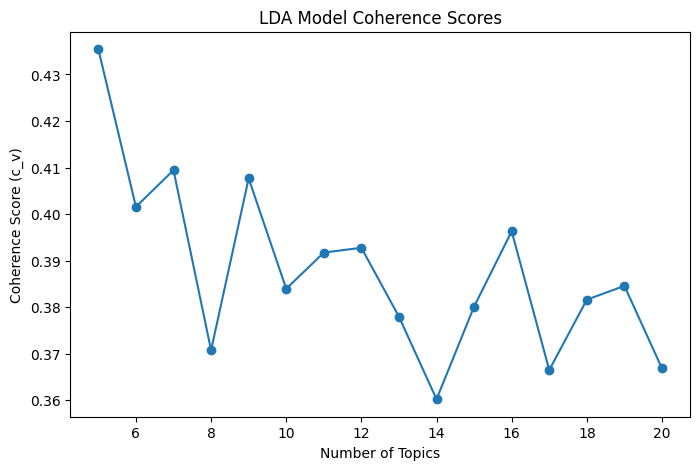

In [16]:
min_topics = 5
max_topics = 20
step = 1

coherence_scores = []
model_list = []

for num in range(min_topics, max_topics + 1, step):

    lda_model = LdaModel(corpus=corpus,
                         num_topics=num,
                         id2word=dictionary,
                         passes=10,
                         random_state=42)
    model_list.append(lda_model)
    
    coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    coherence_scores.append(coherence)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(min_topics, max_topics + 1, step), coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("LDA Model Coherence Scores")
plt.show()

In [26]:
from gensim.models.ldamodel import LdaModel

# Specify the number of topics you want to extract
num_topics = 7

# Train the LDA model on the corpus using the dictionary
lda_model = LdaModel(corpus=corpus,
                     num_topics=num_topics,
                     id2word=dictionary,
                     passes=10,        # Increase if needed for better convergence
                     alpha='auto',
                     random_state=42)

# Display the topics with the top 10 keywords in each topic
for idx, topic in lda_model.print_topics(num_words=15):
    print(f"Topic #{idx}: {topic}")

Topic #0: 0.012*"小說" + 0.011*"咖啡館" + 0.007*"人類" + 0.005*"種種" + 0.005*"擁有" + 0.005*"土地" + 0.004*"寫作" + 0.004*"理由" + 0.004*"人民" + 0.004*"自由" + 0.004*"父親" + 0.004*"拜託" + 0.004*"目前" + 0.004*"熟悉" + 0.004*"對象"
Topic #1: 0.015*"爸爸" + 0.014*"女孩" + 0.012*"男孩" + 0.011*"爺爺" + 0.009*"陽光" + 0.008*"中國" + 0.008*"    " + 0.007*"不禁" + 0.006*"會兒" + 0.006*"同學" + 0.006*"英文" + 0.006*"依然" + 0.006*"漂亮" + 0.006*"尤其" + 0.005*"一向"
Topic #2: 0.009*"死亡" + 0.006*"靈魂" + 0.006*"氣味" + 0.005*"香水" + 0.005*"女孩" + 0.004*"關係" + 0.004*"社會" + 0.003*"生命" + 0.003*"文字" + 0.003*"    " + 0.003*"寂寞" + 0.003*"發出" + 0.003*"同性戀" + 0.003*"意識" + 0.003*"人類"
Topic #3: 0.008*"旅館" + 0.006*"火車" + 0.006*"小鎮" + 0.006*"穿過" + 0.005*"比較" + 0.005*"美麗" + 0.005*"丈夫" + 0.005*"公園" + 0.004*"哪裡" + 0.004*"大樓" + 0.004*"一段" + 0.004*"大學" + 0.004*"    " + 0.004*"男生" + 0.004*"通常"
Topic #4: 0.011*"太太" + 0.008*"女孩" + 0.008*"香港" + 0.007*"廣告" + 0.006*"房間" + 0.005*"裡面" + 0.005*"哥哥" + 0.004*"打電話" + 0.004*"禮拜" + 0.004*"上午" + 0.004*"眼鏡" + 0.004*"五十" + 0.004*"古代" + 

In [27]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [78]:
import numpy as np
import matplotlib.pyplot as plt


import numpy as np
doc_topic_distributions = []
for i, bow in enumerate(corpus):
    distribution = lda_model[bow]  
    dist_vector = [0.0] * num_topics
    for topic_id, prop in distribution:
        dist_vector[topic_id] = prop
    doc_topic_distributions.append(dist_vector)

In [79]:
import os

folder_path = './literature'
file_names = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

titles = []
authors = []
years = []

for file in file_names:
    base_name = file[:-4]  # 移除 '.txt'
    parts = base_name.split('-')
    if len(parts) >= 3:
        title = parts[0]
        author = parts[1]
        year = parts[2]
    else:
        title, author, year = None, None, None
    titles.append(title)
    authors.append(author)
    years.append(year)

In [80]:
import pandas as pd

topic_columns = [f"Topic_{i}" for i in range(num_topics)]

df = pd.DataFrame(doc_topic_distributions, columns=topic_columns)
df['Title'] = titles
df['Author'] = authors
df['Year'] = years

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_sorted = df.sort_values('Year')

print(df_sorted.head())

    Topic_0  Topic_1  Topic_2  Topic_3   Topic_4  Topic_5   Topic_6 Title  \
26      0.0      0.0      0.0      0.0  0.000000      0.0  0.999431   刽子手   
30      0.0      0.0      0.0      0.0  0.000000      0.0  0.999369    捶帖   
19      0.0      0.0      0.0      0.0  0.031591      0.0  0.967854    新坟   
12      0.0      0.0      0.0      0.0  0.000000      0.0  0.999393     贼   
6       0.0      0.0      0.0      0.0  0.000000      0.0  0.999769   锁壳门   

   Author  Year  
26    朱西甯  1957  
30    朱西甯  1958  
19    朱西甯  1958  
12    朱西甯  1959  
6     朱西甯  1961  


   Year  Topic_0  Topic_1  Topic_2   Topic_3   Topic_4   Topic_5   Topic_6
0  1957      0.0      0.0      0.0  0.000000  0.000000  0.000000  0.999431
1  1958      0.0      0.0      0.0  0.000000  0.015796  0.000000  0.983612
2  1959      0.0      0.0      0.0  0.000000  0.000000  0.000000  0.999393
3  1961      0.0      0.0      0.0  0.116276  0.000000  0.000000  0.883359
4  1962      0.0      0.0      0.0  0.000000  0.000000  0.016901  0.981483


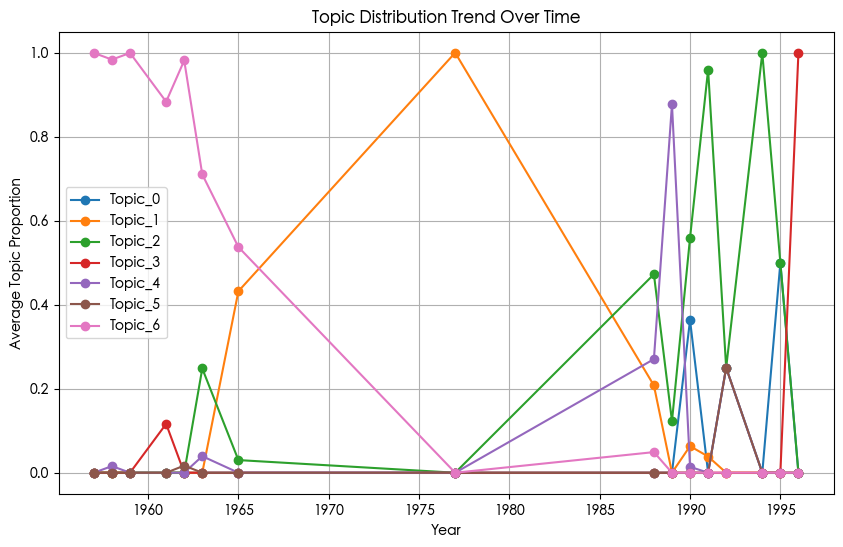

In [81]:
topic_columns = [f"Topic_{i}" for i in range(num_topics)]

df_grouped = df_sorted.groupby('Year')[topic_columns].mean().reset_index()

print(df_grouped.head())
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for topic in topic_columns:
    plt.plot(df_grouped['Year'], df_grouped[topic], marker='o', label=topic)

plt.xlabel("Year")
plt.ylabel("Average Topic Proportion")
plt.title("Topic Distribution Trend Over Time")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [82]:
import pandas as pd

min_year = df_sorted['Year'].min()
max_year = df_sorted['Year'].max()

bins = list(range((min_year // 5) * 5, (max_year // 5 + 1) * 5 + 1, 5))
df_sorted['YearGroup'] = pd.cut(df_sorted['Year'], bins=bins, right=False)
group_counts = df_sorted.groupby('YearGroup').size().reset_index(name='BookCount')
print(group_counts)

      YearGroup  BookCount
0  [1955, 1960)          4
1  [1960, 1965)          9
2  [1965, 1970)          1
3  [1970, 1975)          0
4  [1975, 1980)          1
5  [1980, 1985)          0
6  [1985, 1990)          4
7  [1990, 1995)          9
8  [1995, 2000)          3


/var/folders/p6/pb4fxjzn3r3b73xfyn72rzr00000gn/T/ipykernel_3023/4105571264.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df_sorted.groupby('YearGroup').size().reset_index(name='BookCount')


In [87]:
df_sorted

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Title,Author,Year,YearGroup
26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999431,刽子手,朱西甯,1957,"[1955, 1960)"
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999369,捶帖,朱西甯,1958,"[1955, 1960)"
19,0.000000,0.000000,0.000000,0.000000,0.031591,0.000000,0.967854,新坟,朱西甯,1958,"[1955, 1960)"
12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999393,贼,朱西甯,1959,"[1955, 1960)"
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999769,锁壳门,朱西甯,1961,"[1960, 1965)"
5,0.000000,0.000000,0.000000,0.232553,0.000000,0.000000,0.766948,铁浆,朱西甯,1961,"[1960, 1965)"
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999551,红灯笼,朱西甯,1962,"[1960, 1965)"
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999677,出殃,朱西甯,1962,"[1960, 1965)"
21,0.000000,0.000000,0.000000,0.000000,0.000000,0.050703,0.945222,白坟,朱西甯,1962,"[1960, 1965)"
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999548,春去也,朱西甯,1963,"[1960, 1965)"


In [89]:
df_sorted.loc[df_sorted['Author'] == '朱天心', 'Author'] = 'Tian-Hsin'
df_sorted.loc[df_sorted['Author'] == '朱天文', 'Author'] = 'Tian-Wen'
df_sorted.loc[df_sorted['Author'] == '朱西甯', 'Author'] = 'Hsi-Ning'

In [90]:
import pandas as pd

# 假設你的主題欄位名稱如下
num_topics = 7  # 例如 7 個主題
topic_columns = [f"Topic_{i}" for i in range(num_topics)]

# 將各檔的 topic 分布累加 (絕對數量)
grouped = df_sorted.groupby(['YearGroup', 'Author'])[topic_columns].sum()

# 檢查 group 結構
print(grouped.head())

                        Topic_0  Topic_1   Topic_2   Topic_3   Topic_4  \
YearGroup    Author                                                      
[1955, 1960) Hsi-Ning       0.0      0.0  0.000000  0.000000  0.031591   
             Tian-Hsin      0.0      0.0  0.000000  0.000000  0.000000   
             Tian-Wen       0.0      0.0  0.000000  0.000000  0.000000   
[1960, 1965) Hsi-Ning       0.0      0.0  0.992688  0.232553  0.157425   
             Tian-Hsin      0.0      0.0  0.000000  0.000000  0.000000   

                         Topic_5   Topic_6  
YearGroup    Author                         
[1955, 1960) Hsi-Ning   0.000000  3.966048  
             Tian-Hsin  0.000000  0.000000  
             Tian-Wen   0.000000  0.000000  
[1960, 1965) Hsi-Ning   0.050703  7.551897  
             Tian-Hsin  0.000000  0.000000  


/var/folders/p6/pb4fxjzn3r3b73xfyn72rzr00000gn/T/ipykernel_3023/1645263785.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_sorted.groupby(['YearGroup', 'Author'])[topic_columns].sum()


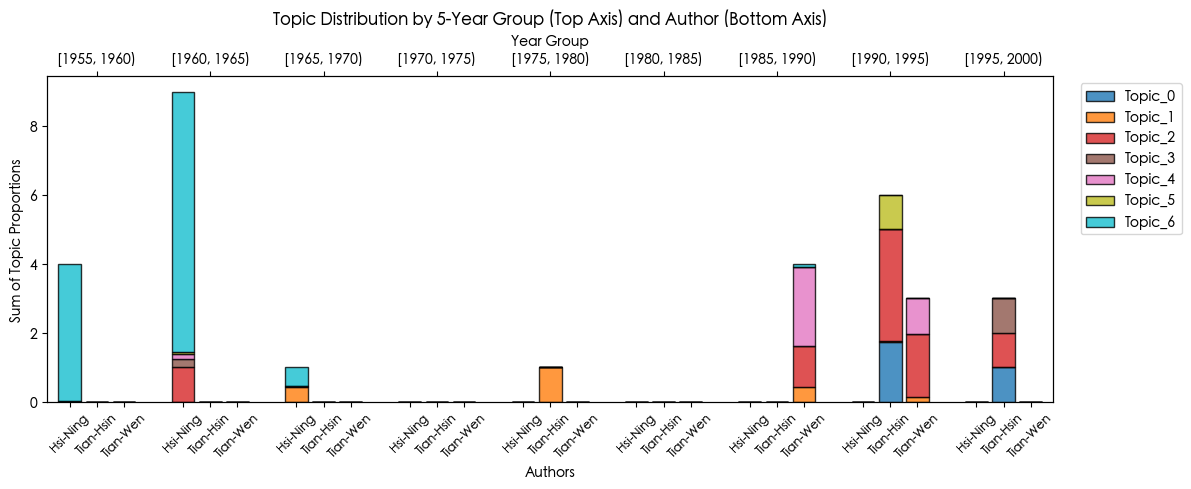

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 假設你已經有：
# 1) grouped：MultiIndex DataFrame，index = (YearGroup, Author)
# 2) topic_columns：例如 ["Topic_0", "Topic_1", ...]
# 3) yeargroups：各 5 年區間的唯一值 (sorted)
# 4) authors：已知作者列表 (如 ["Tian-Hsin", "Tian-Wen", "Hsi-Ning"])

bar_width = 0.2
offsets = np.linspace(-bar_width, bar_width, len(authors)) * 1.2
colors = plt.cm.tab10(np.linspace(0, 1, len(topic_columns)))

fig, ax_bottom = plt.subplots(figsize=(12, 5))

# 建立上軸，與下軸共用 y，但 x 軸互相獨立
ax_top = ax_bottom.twiny()

labels_done = set()

# ------------------------------------------------
# (A) 在下軸 (ax_bottom) 繪製堆疊長條，x 軸只顯示作者
# ------------------------------------------------
all_x_positions = []
all_author_labels = []

for i, yg in enumerate(yeargroups):
    for j, author in enumerate(authors):
        # 取得 (yg, author) 該組數據
        if (yg, author) in grouped.index:
            row = grouped.loc[(yg, author)]
        else:
            row = pd.Series(0, index=topic_columns)
        
        # 計算 bar 的 x 座標：整數 i 代表這個年份區間，再加上作者的位移
        x_pos = i + offsets[j]
        all_x_positions.append(x_pos)
        all_author_labels.append(author)  # 每個 bar 下方要顯示的標籤

        bottom = 0
        for k, topic in enumerate(topic_columns):
            val = row[topic]
            if topic not in labels_done:
                bar_label = topic
                labels_done.add(topic)
            else:
                bar_label = None
            
            ax_bottom.bar(x_pos, val,
                          width=bar_width,
                          bottom=bottom,
                          color=colors[k],
                          edgecolor='black',
                          alpha=0.8,
                          label=bar_label)
            bottom += val

# 下軸：設定每個 bar 的 x tick 與作者標籤
ax_bottom.set_xticks(all_x_positions)
ax_bottom.set_xticklabels(all_author_labels, rotation=45, fontsize=9)
ax_bottom.set_xlabel("Authors")
ax_bottom.set_ylabel("Sum of Topic Proportions")

# ------------------------------------------------
# (B) 在上軸 (ax_top) 只顯示 YearGroup 標籤
# ------------------------------------------------

# 每個年份區間放在 i 的整數座標
yeargroup_x = np.arange(len(yeargroups))
ax_top.set_xticks(yeargroup_x)
ax_top.set_xticklabels([str(yg) for yg in yeargroups], fontsize=10)
ax_top.set_xlabel("Year Group")

# ------------------------------------------------
# (C) 對齊上下軸的 x 範圍
# ------------------------------------------------
# 下軸最左到最右是 (min(all_x_positions), max(all_x_positions))
left_lim = min(all_x_positions) - bar_width
right_lim = max(all_x_positions) + bar_width
ax_bottom.set_xlim(left_lim, right_lim)

# 上軸也要相同的 xlim
ax_top.set_xlim(left_lim, right_lim)

# ------------------------------------------------
# (D) 其他佈局與圖例
# ------------------------------------------------
ax_bottom.set_title("Topic Distribution by 5-Year Group (Top Axis) and Author (Bottom Axis)")
ax_bottom.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [112]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [113]:
import pandas as pd

# 定義數據：每個主題的關鍵詞和摘要（此處請根據你的實際數據進行調整）
data = {
    "Topic": [
        "#0",
        "#1",
        "#2",
        "#3",
        "#4",
        "#5",
        "#6"
    ],
    "Keywords (probability * keyword)": [
        "0.012novel, 0.011caf矇, 0.007humanity, 0.005various, 0.005possess, 0.005land, 0.004writing, 0.004reason, 0.004people, 0.004freedom, 0.004father, 0.004please, 0.004currently, 0.004familiar, 0.004*object",
        "0.015dad, 0.014girl, 0.012boy, 0.011grandpa, 0.009sunshine, 0.008China, 0.008*[space], 0.007couldn脌 help, 0.006moment, 0.006classmate, 0.006English, 0.006still, 0.006beautiful, 0.006especially, 0.005always",
        "0.009death, 0.006soul, 0.006scent, 0.005perfume, 0.005girl, 0.004relationship, 0.004society, 0.003life, 0.003text, 0.003[space], 0.003loneliness, 0.003emit, 0.003homosexuality, 0.003consciousness, 0.003*humanity",
        "0.008hotel, 0.006train, 0.006town, 0.006pass through, 0.005relatively, 0.005beautiful, 0.005husband, 0.005park, 0.004somewhere, 0.004building, 0.004section, 0.004university, 0.004*[space], 0.004boy, 0.004usually",
        "0.011wife, 0.008girl, 0.008Hong Kong, 0.007advertisement, 0.006room, 0.005inside, 0.005brother, 0.004phone call, 0.004week, 0.004morning, 0.004glasses, 0.004fifty, 0.004ancient, 0.004off work, 0.004*game",
        "0.010advertisement, 0.007wife, 0.006girl, 0.005various, 0.005photo, 0.004including, 0.004hotel, 0.004genuine, 0.004girls, 0.004seeking, 0.004mythology, 0.004dock, 0.004interest, 0.004occasion, 0.004*black",
        "0.010master (old man), 0.010buddy, 0.010grandma, 0.009blind man, 0.008matter, 0.007inside, 0.007staring, 0.007tough guy, 0.007second brother, 0.006old fellow, 0.005strength, 0.005livestock, 0.005a bit, 0.005towards, 0.005*suddenly"
    ],
    "Summary Sentence": [
        "Reflections on writing, human freedom, and interpersonal relationships set in everyday spaces such as caf矇s and personal environments.",
        "Family bonds, youthful memories, and nostalgic everyday moments highlighting familial and social interactions.",
        "Explorations of existential themes including death, solitude, human consciousness, and sensory experiences.",
        "Descriptions of travel, transition, and interpersonal experiences across urban and rural environments.",
        "Depictions of family dynamics, daily routines, and modern urban life, notably involving domestic and commercial spaces.",
        "Portrayals of cultural and commercial imagery, personal quests, and mythological themes intertwined with personal relationships.",
        "Vivid narratives featuring colloquial dialogue, rustic settings, and strong character portrayals of rural and traditional life."
    ]
}

# 建立 DataFrame
df = pd.DataFrame(data)

# 若想以 Markdown 格式輸出
print(df.to_markdown(index=False))

# 或者，你可以直接利用 Pandas 的 Jupyter Notebook 顯示功能（例如 display(df)）

| Topic   | Keywords (probability * keyword)                                                                                                                                                                                                       | Summary Sentence                                                                                                                        |
|:--------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------|
| #0      | 0.012novel, 0.011caf矇, 0.007humanity, 0.005various, 0.005possess, 0.005land, 0.004writing, 0.004reason, 0.004people, 0.004freedom, 0.004father, 0.004please, 0.004currently, 0.004familiar, 0.004*object                      

| Topic   | Keywords (probability * keyword)                                                                                                                                                                                                       | Summary Sentence                                                                                                                        |
|:--------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------------------------------------|
| #0      | 0.012novel, 0.011caf矇, 0.007humanity, 0.005various, 0.005possess, 0.005land, 0.004writing, 0.004reason, 0.004people, 0.004freedom, 0.004father, 0.004please, 0.004currently, 0.004familiar, 0.004*object                              | Reflections on writing, human freedom, and interpersonal relationships set in everyday spaces such as cafe and personal environments. |
| #1      | 0.015dad, 0.014girl, 0.012boy, 0.011grandpa, 0.009sunshine, 0.008China, 0.008*[None], 0.007couldn脌 help, 0.006moment, 0.006classmate, 0.006English, 0.006still, 0.006beautiful, 0.006especially, 0.005always                         | Family bonds, youthful memories, and nostalgic everyday moments highlighting familial and social interactions.                          |
| #2      | 0.009death, 0.006soul, 0.006scent, 0.005perfume, 0.005girl, 0.004relationship, 0.004society, 0.003life, 0.003text, 0.003[None], 0.003loneliness, 0.003emit, 0.003homosexuality, 0.003consciousness, 0.003*humanity                    | Explorations of existential themes including death, solitude, human consciousness, and sensory experiences.                             |
| #3      | 0.008hotel, 0.006train, 0.006town, 0.006pass through, 0.005relatively, 0.005beautiful, 0.005husband, 0.005park, 0.004somewhere, 0.004building, 0.004section, 0.004university, 0.004*[None], 0.004boy, 0.004usually                    | Descriptions of travel, transition, and interpersonal experiences across urban and rural environments.                                  |
| #4      | 0.011wife, 0.008girl, 0.008Hong Kong, 0.007advertisement, 0.006room, 0.005inside, 0.005brother, 0.004phone call, 0.004week, 0.004morning, 0.004glasses, 0.004fifty, 0.004ancient, 0.004off work, 0.004*game                            | Depictions of family dynamics, daily routines, and modern urban life, notably involving domestic and commercial spaces.                 |
| #5      | 0.010advertisement, 0.007wife, 0.006girl, 0.005various, 0.005photo, 0.004including, 0.004hotel, 0.004genuine, 0.004girls, 0.004seeking, 0.004mythology, 0.004dock, 0.004interest, 0.004occasion, 0.004*black                           | Portrayals of cultural and commercial imagery, personal quests, and mythological themes intertwined with personal relationships.        |
| #6      | 0.010master (old man), 0.010buddy, 0.010grandma, 0.009blind man, 0.008matter, 0.007inside, 0.007staring, 0.007tough guy, 0.007second brother, 0.006old fellow, 0.005strength, 0.005livestock, 0.005a bit, 0.005towards, 0.005*suddenly | Vivid narratives featuring colloquial dialogue, rustic settings, and strong character portrayals of rural and traditional life.         |